In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

import pandas as pd
import numpy as np
import seaborn as sns

In [82]:
df = pd.read_csv('employee_promotion.csv')

In [83]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [84]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [85]:
df.gender.unique()

array(['f', 'm'], dtype=object)

In [86]:
df.gender = df.gender.map({'m' : 1, 'f' : 2})

In [87]:
df.describe()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.297621,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.457216,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,2.000000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [88]:
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [89]:
df.department = df.department.map({'Sales & Marketing': 1, 'Operations': 2, 'Technology': 3, 'Analytics': 4,
       'R&D': 5, 'Procurement': 6, 'Finance': 7, 'HR': 8, 'Legal': 9})

In [90]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [91]:
df.education = df.education.map({"Master's & above": 1, "Bachelor's":2, 'Below Secondary': 3})

In [92]:
df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [93]:
df.recruitment_channel = df.recruitment_channel.map({'sourcing': 1, 'other': 2, 'referred': 3})

In [94]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [95]:
df.region = df.region.str.strip()

In [96]:
lencoder_region = preprocessing.LabelEncoder()

In [97]:
lencoder_region.fit(df.region)

LabelEncoder()

In [98]:
df.region = lencoder_region.transform(df.region)

In [99]:
df.tail(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54798,40257,1,11,1.0,2,2,2,40,5.0,4,0,51.0,0
54799,68093,6,11,1.0,2,2,1,50,5.0,6,1,67.0,0
54800,39227,8,2,2.0,1,2,2,34,5.0,3,0,52.0,0
54801,12431,3,18,2.0,2,1,1,31,NaN,1,0,78.0,0
54802,6915,1,5,2.0,1,2,2,31,1.0,2,0,49.0,0
54803,3030,3,5,2.0,1,1,1,48,3.0,17,0,78.0,0
54804,74592,2,19,1.0,2,2,1,37,2.0,6,0,56.0,0
54805,13918,4,0,2.0,1,2,1,27,5.0,3,0,79.0,0
54806,13614,1,33,NaN,1,1,1,29,1.0,2,0,NaN,0
54807,51526,8,14,2.0,1,2,1,27,1.0,5,0,49.0,0


In [100]:
corr = round(df.corr(), 4)
corr.style.background_gradient()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,0.006800,-0.003400,-0.003800,0.001500,-0.005400,-0.005100,0.000400,0.004500,0.001300,0.008400,-0.000700,0.001200
department,0.006800,1.000000,-0.010000,0.017100,0.078700,0.010100,-0.005800,-0.050300,0.065100,-0.048800,0.003900,0.338400,0.001400
region,-0.003400,-0.010000,1.000000,-0.000500,-0.019700,-0.017800,-0.004600,-0.088900,-0.005000,-0.058900,0.000300,0.024400,0.008800
education,-0.003800,0.017100,-0.000500,1.000000,-0.017300,0.009200,0.037100,-0.389800,-0.010300,-0.265400,-0.000500,-0.015800,-0.025400
gender,0.001500,0.078700,-0.019700,-0.017300,1.000000,0.003100,-0.084500,0.016300,0.024200,0.019700,-0.002400,0.023500,0.011100
recruitment_channel,-0.005400,0.010100,-0.017800,0.009200,0.003100,1.000000,0.004100,-0.006500,0.022500,-0.009600,0.006300,0.014800,0.005500
no_of_trainings,-0.005100,-0.005800,-0.004600,0.037100,-0.084500,0.004100,1.000000,-0.081300,-0.063100,-0.057300,-0.007600,0.044400,-0.024900
age,0.000400,-0.050300,-0.088900,-0.389800,0.016300,-0.006500,-0.081300,1.000000,0.006000,0.657100,-0.008200,-0.049500,-0.017200
previous_year_rating,0.004500,0.065100,-0.005000,-0.010300,0.024200,0.022500,-0.063100,0.006000,1.000000,0.000300,0.027700,0.075500,0.159300
length_of_service,0.001300,-0.048800,-0.058900,-0.265400,0.019700,-0.009600,-0.057300,0.657100,0.000300,1.000000,-0.039900,-0.039400,-0.010700


In [101]:
df.drop(['employee_id', 'previous_year_rating'], axis = 1, inplace = True)

In [102]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,awards_won,avg_training_score,is_promoted
0,1,31,1.0,2,1,1,35,8,0,49.0,0
1,2,14,2.0,1,2,1,30,4,0,60.0,0
2,1,10,2.0,1,1,1,34,7,0,50.0,0
3,1,15,2.0,1,2,2,39,10,0,50.0,0
4,3,18,2.0,1,2,1,45,2,0,73.0,0


In [103]:
data_x = df.drop(['recruitment_channel', 'awards_won','is_promoted'], axis='columns')
data_y = df.is_promoted

In [104]:
df.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,52399.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,3.222668,15.428970,1.730529,1.297621,1.597176,1.253011,34.803915,5.865512,0.023172,63.712238,0.085170
std,2.292378,8.764954,0.477060,0.457216,0.531258,0.609264,7.660169,4.265094,0.150450,13.521910,0.279137
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,29.000000,3.000000,0.000000,51.000000,0.000000
50%,2.000000,14.000000,2.000000,1.000000,2.000000,1.000000,33.000000,5.000000,0.000000,60.000000,0.000000
75%,5.000000,21.000000,2.000000,2.000000,2.000000,1.000000,39.000000,7.000000,0.000000,77.000000,0.000000
max,9.000000,33.000000,3.000000,2.000000,3.000000,10.000000,60.000000,37.000000,1.000000,99.000000,1.000000


In [105]:
data_x.education = data_x.education.fillna(data_x.education.mean())

In [106]:
data_x.avg_training_score = data_x.avg_training_score.fillna(data_x.avg_training_score.mean())

In [107]:
df.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,52399.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,3.222668,15.428970,1.730529,1.297621,1.597176,1.253011,34.803915,5.865512,0.023172,63.712238,0.085170
std,2.292378,8.764954,0.477060,0.457216,0.531258,0.609264,7.660169,4.265094,0.150450,13.521910,0.279137
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,29.000000,3.000000,0.000000,51.000000,0.000000
50%,2.000000,14.000000,2.000000,1.000000,2.000000,1.000000,33.000000,5.000000,0.000000,60.000000,0.000000
75%,5.000000,21.000000,2.000000,2.000000,2.000000,1.000000,39.000000,7.000000,0.000000,77.000000,0.000000
max,9.000000,33.000000,3.000000,2.000000,3.000000,10.000000,60.000000,37.000000,1.000000,99.000000,1.000000


In [108]:
data_x


,department,region,education,gender,no_of_trainings,age,length_of_service,avg_training_score
0,1,31,1.000000,2,1,35,8,49.000000
1,2,14,2.000000,1,1,30,4,60.000000
2,1,10,2.000000,1,1,34,7,50.000000
3,1,15,2.000000,1,2,39,10,50.000000
4,3,18,2.000000,1,1,45,2,73.000000
...,...,...,...,...,...,...,...,...
54803,3,5,2.000000,1,1,48,17,78.000000
54804,2,19,1.000000,2,1,37,6,56.000000
54805,4,0,2.000000,1,1,27,3,79.000000
54806,1,33,1.730529,1,1,29,2,63.712238


In [109]:
data_y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

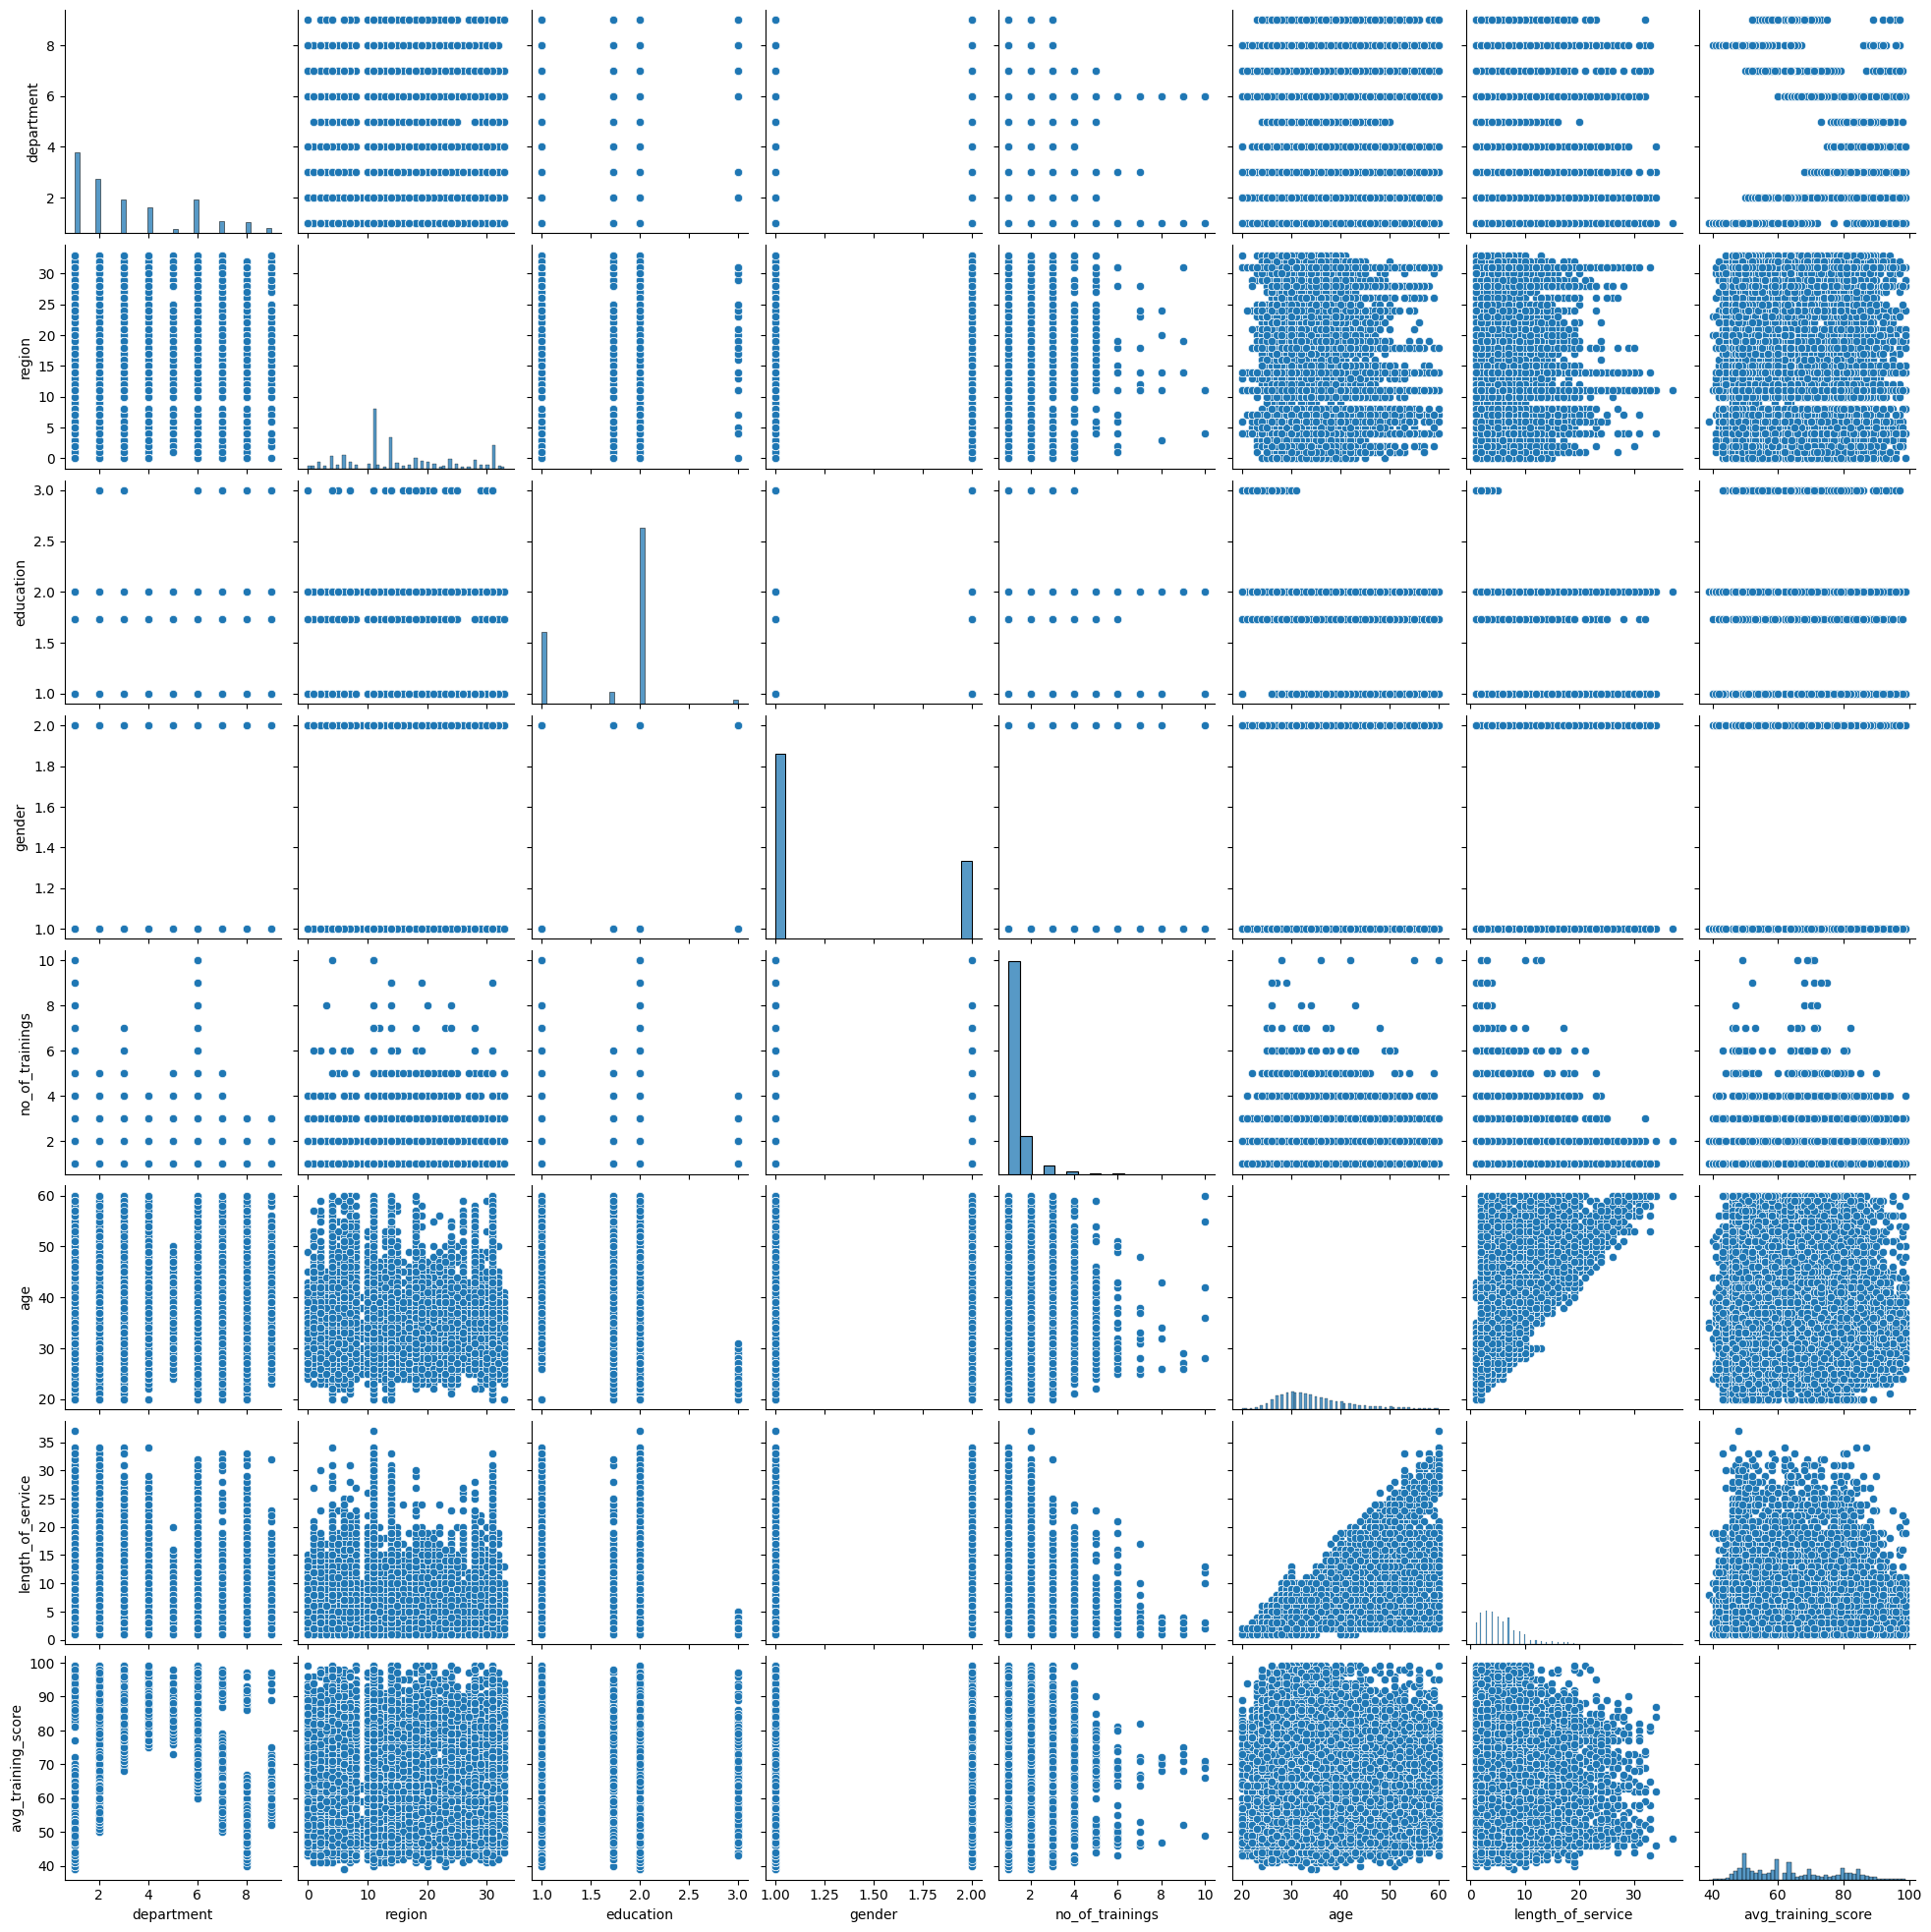

In [110]:
sns.pairplot(data_x)

In [111]:
forest = RandomForestClassifier()

In [112]:
forest.fit(data_x, data_y)

RandomForestClassifier()

In [113]:
print(f'El score del modelo es:{round(forest.score(data_x,data_y),4)*100}%')

El score del modelo es:99.44%


In [114]:
genre = ['None', 'masculino', 'femenino']
educacion = ['None',"Master's & above", "Bachelor's", 'Below Secondary']
departament = ['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal']
promoved = ['no promovido', 'promovido']

department = 7
region = 28
gender = 2
education = 2
age = 36
length_of_service = 8
avg_training_score = 92.00
no_of_trainings = 1

In [115]:
def empleado_classify(model, age, gender, region, department, length_of_service, avg_training_score, no_of_trainings, education):
    predicted =  model.predict([[age, gender, region, department, length_of_service, avg_training_score, no_of_trainings, education]])
    print(f'El / la empleado(a) de sexo {genre[gender]}, de {age} años, con grado de educacion {educacion[education]}, perteneciente al departamento de {departament[department]}, region {region} y que tiene {length_of_service} años de servicio, realizo {no_of_trainings} entrenamiento, con puntuacion de {avg_training_score}:sera {promoved[predicted[0]]}')

In [116]:
empleado_classify(forest, age, gender, region, department, length_of_service, avg_training_score, no_of_trainings, education)

El / la empleado(a) de sexo femenino, de 36 años, con grado de educacion Bachelor's, perteneciente al departamento de HR, region 28 y que tiene 8 años de servicio, realizo 1 entrenamiento, con puntuacion de 92.0:sera no promovido


c:\Users\Asus\Desktop\PCode\Pandas\entorno_v\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
